Требования к анализу:
построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [4]:
df_master = pd.read_csv('C:\\Users\\Nat\\Downloads\\archive (3)\master.csv')
df_master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
df_master['suicides/100k pop'] = df_master['suicides/100k pop'].astype('int64', errors='ignore')

In [7]:
# можно рассмотреть общие тенденции по суицидам среди мужчин и женщин по годам 
dynamics_by_sex = df_master.groupby(['year','sex'])['suicides_no'].sum().reset_index()
dynamics_by_sex.head()

,year,sex,suicides_no
0,1985,female,32479
1,1985,male,83584
2,1986,female,33852
3,1986,male,86818
4,1987,female,35006


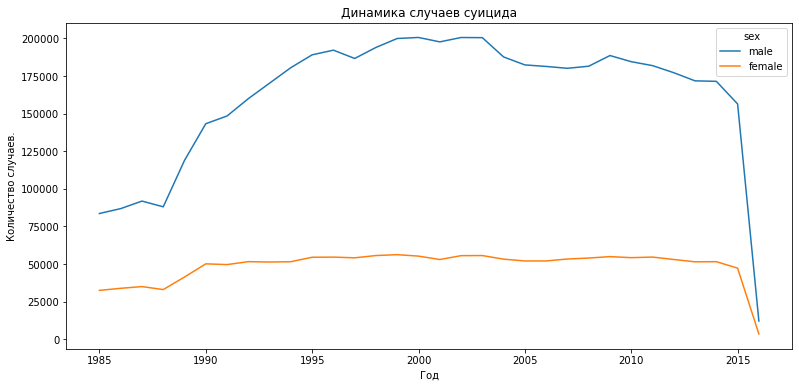

In [8]:
# рассмотрим динамику суицидов за весь период . Выводы: случаи суицида среди мужчин почти в 3 раза чаще чем среди женщин.
male = dynamics_by_sex[dynamics_by_sex.sex == 'male']
female = dynamics_by_sex[dynamics_by_sex.sex == 'female']
plt.plot(male['year'], male['suicides_no'], label = 'male')
plt.plot(female['year'], female['suicides_no'], label = 'female')
plt.title('Динамика случаев суицида')
plt.xlabel('Год')
plt.ylabel('Количество случаев.')
plt.legend(title = 'sex')

<AxesSubplot:xlabel='country'>

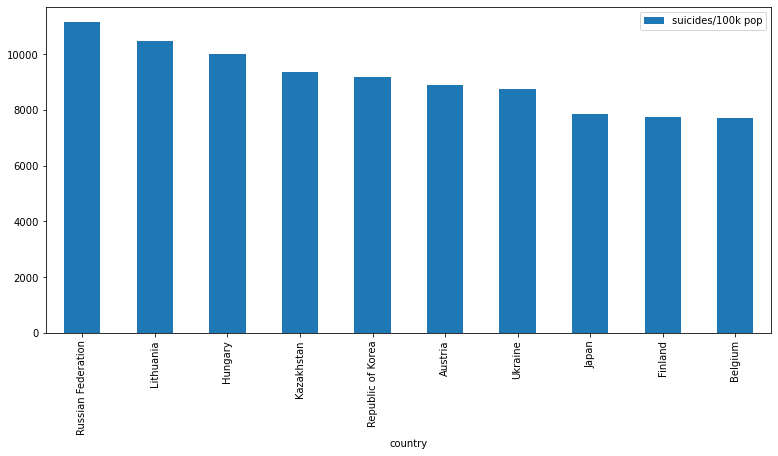

In [70]:
# количество суицидов на 100 тыс человек в разрезе стран топ-10 за весь период времени
top_country = df_master.groupby(['country'])[['suicides/100k pop']].sum().sort_values('suicides/100k pop', ascending=False).head(10)
top_country.plot(kind = 'bar', stacked=True)

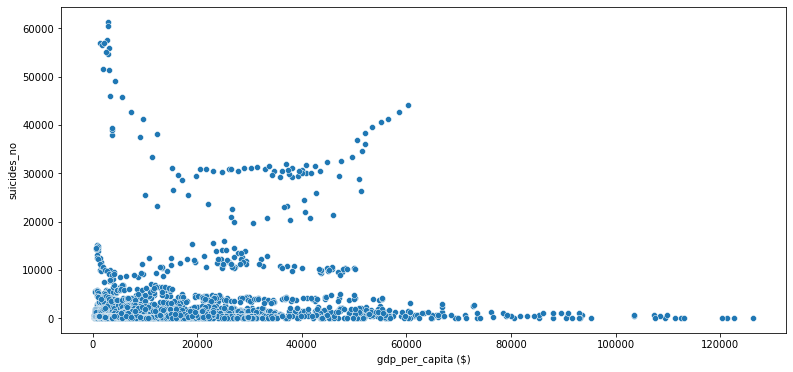

In [66]:
import seaborn as sns
dinamic_by_age = df_master.groupby(['year','country','gdp_per_capita ($)'])[['suicides_no']].sum().reset_index()

# посмотрим зависимость количества суицидов между ВВП на душу начеления
ax = sns.scatterplot(data=dinamic_by_age, x='gdp_per_capita ($)', y='suicides_no');

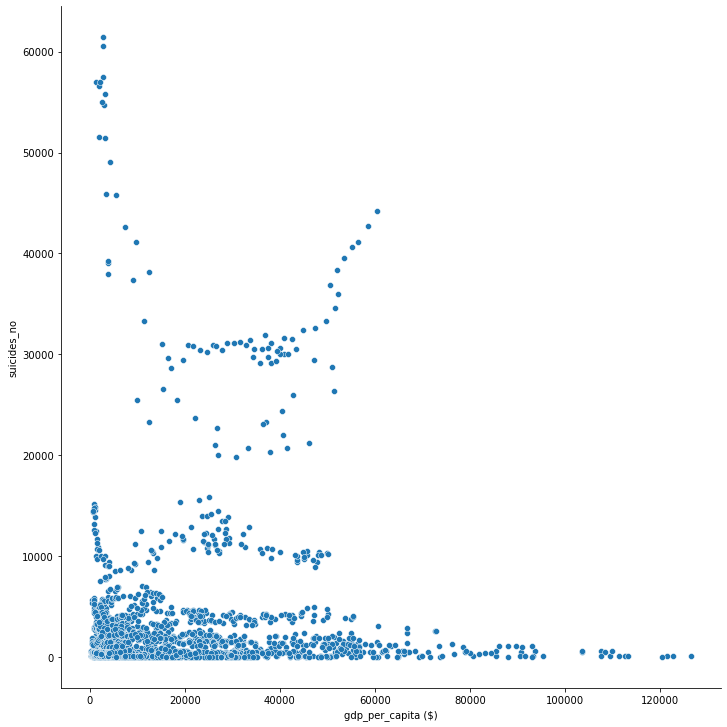

In [67]:
# чем этот график отличается от предыдущего??
sns.relplot(data=dinamic_by_age, x='gdp_per_capita ($)', y='suicides_no',height=10);

<AxesSubplot:title={'center':'suicides_no'}, xlabel='sex'>

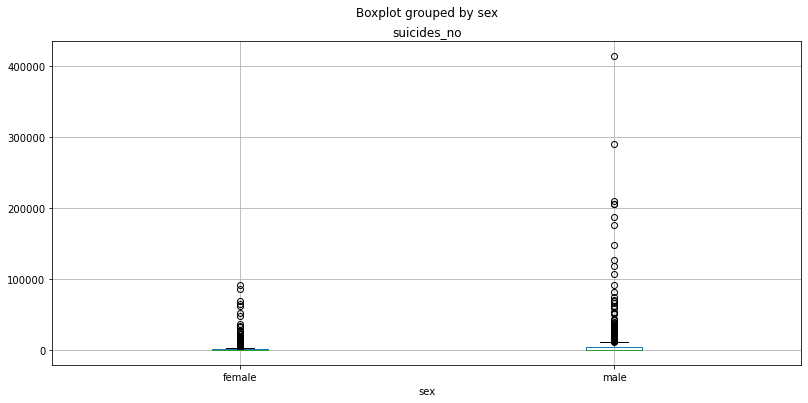

In [85]:

# распределение общего количества суицидов по полу
suicides = df_master.groupby(['country','sex','age'])[['suicides_no']].sum().reset_index()
suicides.boxplot(column = ['suicides_no'], by = 'sex')



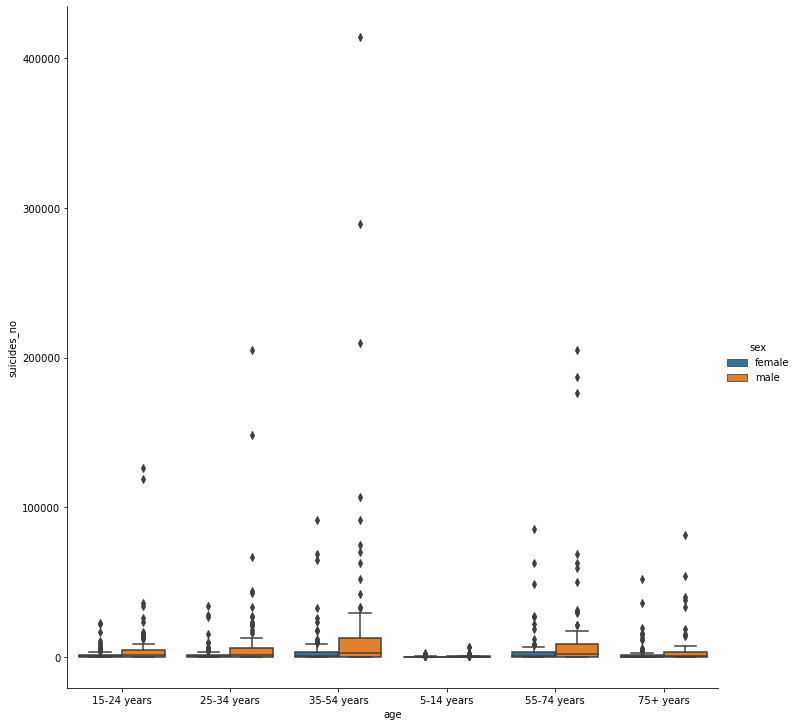

In [86]:
# распределение количества суицидов по возрастным группам
sns.catplot(data=suicides,
            x='age',
            y='suicides_no',
            hue='sex',
            kind='box', height=10);

# Добрый день, Олег, так много вопросов по этим графикам. Как правильно их интерпретировать, как понять правильно ли построен график. Не могли вы прокомментировать графики? Первые две визуализации просты и понятны, а вот с точечной диаграммой и боксплотами проблема. 

# вопросы 
мне не совсем понятно, как группировка влияет на график...здесь убрала один столбец и получила другие графики... 

<AxesSubplot:title={'center':'suicides_no'}, xlabel='sex'>

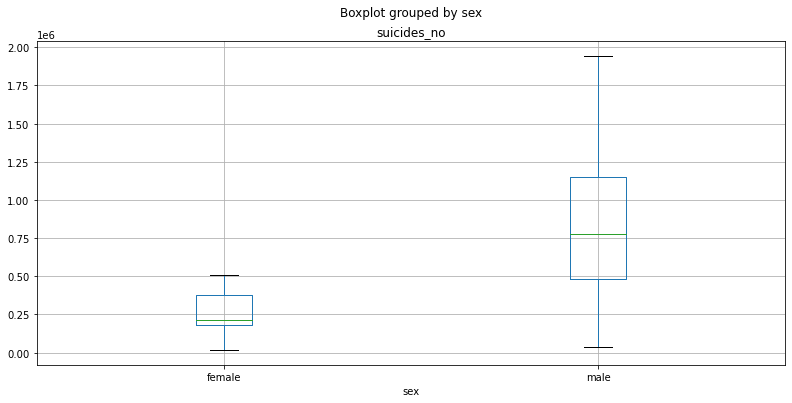

In [91]:
suicides1 = df_master.groupby(['sex','age'])[['suicides_no']].sum().reset_index()
suicides1.boxplot(column = ['suicides_no'], by = 'sex')

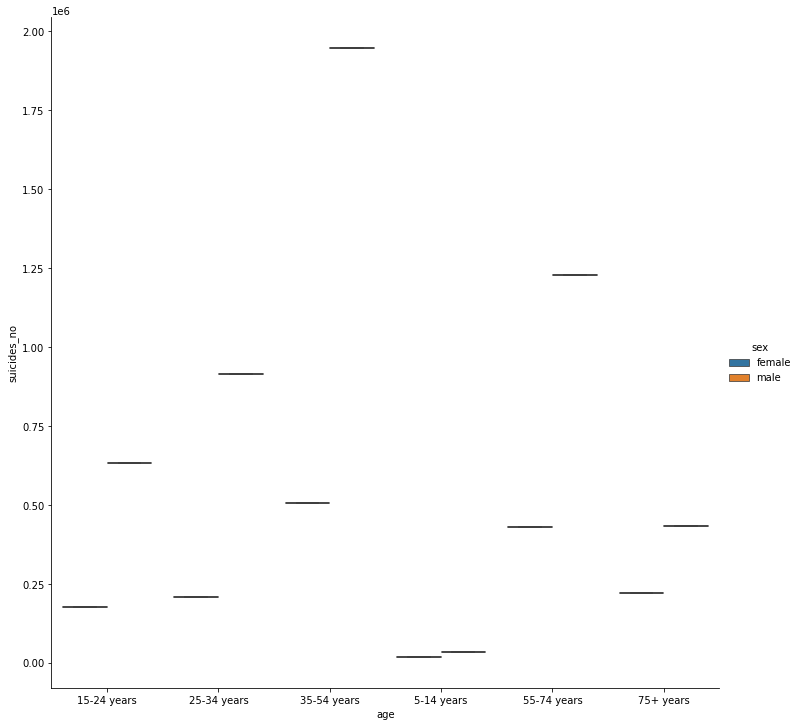

In [92]:
# распределение количества суицидов по возрастным группам
sns.catplot(data=suicides1,
            x='age',
            y='suicides_no',
            hue='sex',
            kind='box', height=10);